<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#22회-통계분석" data-toc-modified-id="22회-통계분석-1">22회 통계분석</a></span><ul class="toc-item"><li><span><a href="#회사는-제품에-금속-재질-함유량의-분산이-1.3을-넘으면-불량이라고-판단한다.-회사에서는-품질경영팀으로부터-제조사별로-금속함유량이-차이가-난다고-제보를-받았다.-해당-금속함유량-데이터에-대한-검정을-수행하시오.-(유의확률:0.05)-" data-toc-modified-id="회사는-제품에-금속-재질-함유량의-분산이-1.3을-넘으면-불량이라고-판단한다.-회사에서는-품질경영팀으로부터-제조사별로-금속함유량이-차이가-난다고-제보를-받았다.-해당-금속함유량-데이터에-대한-검정을-수행하시오.-(유의확률:0.05)--1.1">회사는 제품에 금속 재질 함유량의 분산이 1.3을 넘으면 불량이라고 판단한다. 회사에서는 품질경영팀으로부터 제조사별로 금속함유량이 차이가 난다고 제보를 받았다. 해당 금속함유량 데이터에 대한 검정을 수행하시오. (유의확률:0.05) <br></a></span><ul class="toc-item"><li><span><a href="#연구가설과-귀무가설을-작성시오" data-toc-modified-id="연구가설과-귀무가설을-작성시오-1.1.1">연구가설과 귀무가설을 작성시오<br></a></span></li><li><span><a href="#가설을-양측-검정-" data-toc-modified-id="가설을-양측-검정--1.1.2">가설을 양측 검정 <br></a></span></li><li><span><a href="#검정통계량,-가설-채택" data-toc-modified-id="검정통계량,-가설-채택-1.1.3">검정통계량, 가설 채택<br></a></span></li></ul></li><li><span><a href="#200개의-Lot별-불량-제품-수량-데이터에-따라-아래의-값을-구하시오.-" data-toc-modified-id="200개의-Lot별-불량-제품-수량-데이터에-따라-아래의-값을-구하시오.--1.2">200개의 Lot별 불량 제품 수량 데이터에 따라 아래의 값을 구하시오. <br></a></span></li></ul></li></ul></div>

# 22회 통계분석 

#### 회사는 제품에 금속 재질 함유량의 분산이 1.3을 넘으면 불량이라고 판단한다. 회사에서는 품질경영팀으로부터 제조사별로 금속함유량이 차이가 난다고 제보를 받았다. 해당 금속함유량 데이터에 대한 검정을 수행하시오. (유의확률:0.05) <br>
##### 연구가설과 귀무가설을 작성시오<br>
##### 가설을 양측 검정 <br>
##### 검정통계량, 가설 채택<br>


In [2]:
import pandas as pd 
import numpy as np 
## 데이터 불러오기 
df = pd.read_csv('../data/metalicity')
df

,metalicity
0,42.731551
1,46.429668
2,45.754023
3,45.808060
4,44.072529
...,...
145,45.915727
146,45.277868
147,45.082157
148,44.297235


In [3]:
df.info() # 결측치 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   metalicity  150 non-null    float64
dtypes: float64(1)
memory usage: 1.3 KB


4-1 연구가설과 귀무가설 작성

각 범주에 따른 데이터의 분포가 이론적으로 기대하는 분포를 따르는지 검정하기 위해 카이 스퀘어 검정을 이용한다.

- H0 : 서로 다른 제조업체의 제품 간 금속 함유량의 분산(시그마 제곱)은 1.3이다.
- H1 : 서로 다른 제조업체의 제품 간 금속 함유량의 분산은 1.3이 아니다.

In [5]:
from scipy.stats import chi2
import numpy as np

def varTest(data, expected_variance, alpha=0.05):
    n = len(data)
    observed_variance = np.var(data, ddof=1)  # ddof = 1 because of Sample variance (s-1)

    chi2_critical = chi2.ppf(1 - alpha, n - 1)  # percent point function (critical value, degree of freedom)
    chi2_statistic = (n - 1) * observed_variance / expected_variance

    p_value = 1 - chi2.cdf(chi2_statistic, n - 1) # Cumulative Distribution Function

    result = {
        'Observed Variance': observed_variance,
        'Expected Variance': expected_variance,
        'Chi-square Critical Value':chi2_critical,
        'Chi-square Statistic': chi2_statistic,
        'p-value': p_value
    }

    if p_value <= alpha:
        result['Conclusion'] = '귀무가설 기각, 분산은 유의미하게 각 제조사별로 다르다.'
    else:
        result['Conclusion'] = '귀무가설 채택, 분산은 유의미하게 각 제조사별로 다르지 않다.'

    return result

result = varTest(df['metalicity'].tolist(), expected_variance=1.3)

In [6]:
print('검정 통계량 :', result['Chi-square Statistic'])
print('가설 검정 채택 :', result['Conclusion'])

검정 통계량 : 85.18226674560604
가설 검정 채택 : 귀무가설 채택, 분산은 유의미하게 각 제조사별로 다르지 않다.



##### 2. 200개의 Lot별 불량 제품 수량 데이터에 따라 아래의 값을 구하시오. <br>
- p관리도 : 전체품목의 표본에서 부적합 부품의 수의 비율 
2.1 p관리도에 따라 관리중심선(center line), 관리 상한선, 하한선 구하시오<br>
2.2 관리도 시각화 하시오<br>



In [15]:
df2 = pd.read_csv('../data/lot_quality.csv')
df2 = df2.set_index('lot')
df2

,생산수량,불량수량
lot,,
1,587,19
2,588,15
3,455,19
4,666,12
5,750,15
...,...,...
196,631,18
197,565,21
198,570,12


n : lot별 생산수량

p : lot별 불량수량 %

CL(관리중심선) : 전체 불량수량 / 전체 생산수량

관리 상하한선 : p +- 3((p(1-p)/n))^0.5

In [28]:
print('관리 중심선', df2['불량수량'].sum()/df2['생산수량'].sum())

df2['p'] = df2['불량수량']/df2['생산수량']
df2['UCL'] = df2['p'] + 3 * ((df2['p'] * (1 - df2['p']) / df2['생산수량']) ** 0.5)
df2['LCL'] = df2['p'] - 3 * ((df2['p'] * (1 - df2['p']) / df2['생산수량']) ** 0.5)

관리 중심선 0.029024320840935338


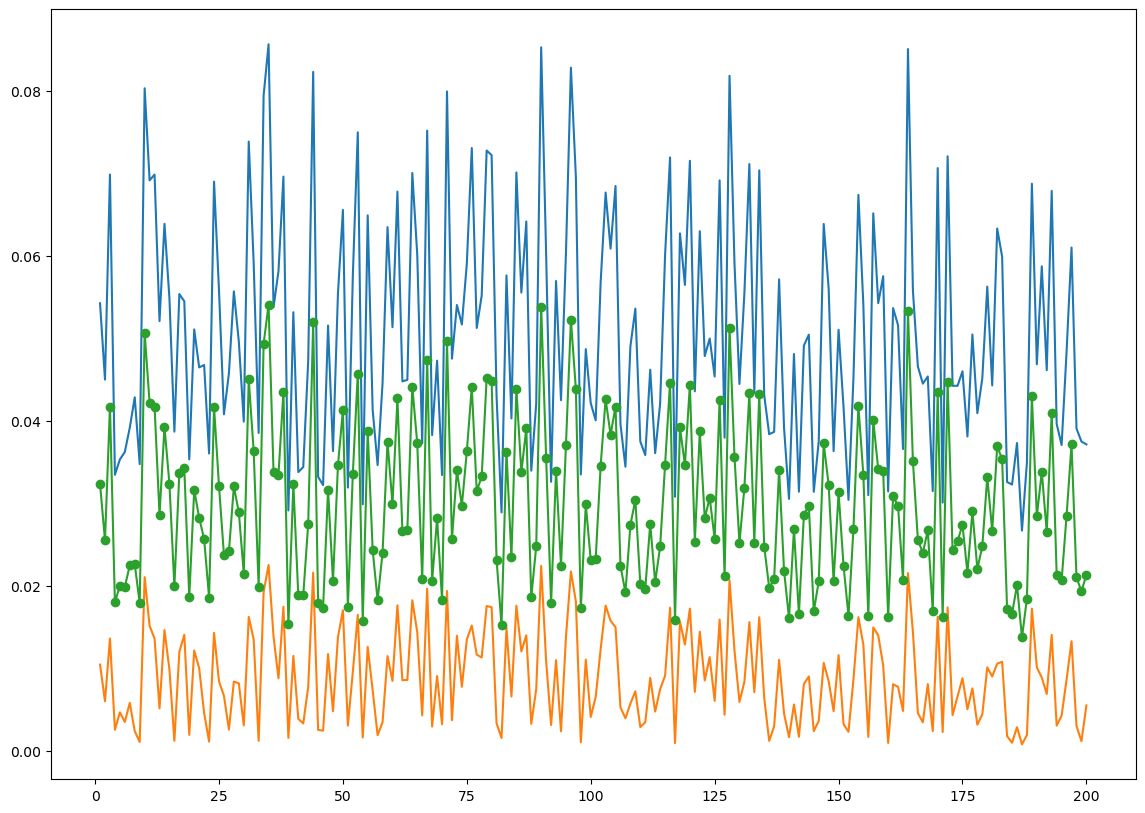

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
plt.plot(df2['UCL'])
plt.plot(df2['LCL'])
plt.plot(df2['p'], marker='o')

3.표에 제품 1, 2를 만드는데 재료 a, b, c가 일부 사용되며, 제품 1과 2를 만들 때 12만원과 18만원을 벌 수 있다. 재료는 한정적으로 주어지는데, 이때 최대 수익을 낼 수 있을 때의 제품 1과 제품2의 개수를 구하라.
재료 공급량 { a: 1300, b: 1000, c:1200 }(10점)


In [45]:
product1 = 12
product2 = 18
max_comb = [1300, 1000, 1200]
comb_1 = [20, 20, 20]
comb_2 = [40, 30, 30]

max_prod_1 = int(min([max_c/c for max_c, c in zip(max_comb, comb_1)]))
max_prod_2 = int(min([max_c/c for max_c, c in zip(max_comb, comb_2)]))

candidate = []
for i in range(max_prod_1+1):
    for j in range(max_prod_2+1):
        comb = [True if max_comb[z] >= (c1 * i) + (c2 * j) else False for z, (c1, c2) in enumerate(zip(comb_1, comb_2))]
        if all(comb):
            candidate.append([(product1 * i) + (product2 * j), i, j])

candidate = sorted(candidate, reverse=True)
max_profit = max(sum(candidate,[]))
for p, c1, c2 in candidate:
    if p == max_profit:
        print('가능한 조합 :', '제품 1 -', c1, '제품 2 -', c2)

가능한 조합 : 제품 1 - 50 제품 2 - 0
가능한 조합 : 제품 1 - 47 제품 2 - 2
가능한 조합 : 제품 1 - 44 제품 2 - 4
가능한 조합 : 제품 1 - 41 제품 2 - 6
가능한 조합 : 제품 1 - 38 제품 2 - 8
가능한 조합 : 제품 1 - 35 제품 2 - 10
가능한 조합 : 제품 1 - 32 제품 2 - 12
가능한 조합 : 제품 1 - 29 제품 2 - 14
가능한 조합 : 제품 1 - 26 제품 2 - 16
가능한 조합 : 제품 1 - 23 제품 2 - 18
가능한 조합 : 제품 1 - 20 제품 2 - 20
가능한 조합 : 제품 1 - 17 제품 2 - 22
가능한 조합 : 제품 1 - 14 제품 2 - 24
가능한 조합 : 제품 1 - 11 제품 2 - 26
가능한 조합 : 제품 1 - 8 제품 2 - 28
가능한 조합 : 제품 1 - 5 제품 2 - 30



4.상품 a와 b가 있을 때 다음과 같은 구매 패턴이 있다고 함. ['a','a','b','b','a','a','a','a','b','b','b','b','b','a','a','b','b','a','b','b']<br>
4.1 구매하는 패턴으로 봐서 두 상품이 연관이 있는지 가설 세우고 검정하시오<br>
4.2 연구가설 귀무가설 세우시오<br>
4.3 가설 채택하시오

In [8]:
import pandas as pd 

data = ['a','a','b','b','a','a','a','a','b','b','b','b','b','a','a','b','b','a','b','b']
data = [1 if d == 'a' else 0 for d in data]
product_df = pd.DataFrame(data, columns=['product'])
product_df.head()

,product
0,1
1,1
2,0
3,0
4,1


#### run-test
H0 : 연속적인 관측값이 임의적이다.

H1 : 연속적인 관측값이 임의적이 아니다(연관이 있다).

p-value값이 0.05보다 크므로 귀무가설을 채택. a와 b는 임의적으로 발생하였으므로 연관이 없음 

In [14]:
from statsmodels.sandbox.stats.runs import runstest_1samp

print('p-value', runstest_1samp(product_df['product'], cutoff=0.5)[1])

p-value 0.26506984027306035
